In [3]:
import  wheel, networkx, scipy, community, tqdm, pymongo, spacy, scispacy, pybind11, nmslib, wosfile, community, numpy, pandas, matplotlib, seaborn

In [2]:
from git import Repo

# specify the URL of the repository and the local path where you want to clone it
repo_url = 'https://github.com/FlorenceBL/novelpy.git'
local_path = 'C://Users//FlorenceBlandinieres//OneDrive - Technopolis Group Ltd//RD_pub_patentforecast//test_Marchnovelpy'
# clone the repository
Repo.clone_from(repo_url, local_path)

<git.repo.base.Repo 'C:\\Users\\FlorenceBlandinieres\\OneDrive - Technopolis Group Ltd\\RD_pub_patentforecast\\test_Marchnovelpy\\.git'>

In [16]:
#pip install pipreqs
import pipreqs

In [17]:
pip install -r requirements.txt -v

Using pip 24.0 from c:\Users\FlorenceBlandinieres\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip (python 3.11)Note: you may need to restart the kernel to use updated packages.



ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [3]:
import sys

sys.path.append(local_path)

In [4]:
from test_Marchnovelpy import novelpy

In [5]:
from novelpy.utils.get_sample import download_sample

download_sample() #exports to the folder where the script is located and creates a new folder Data > docs> datasets

Citation_net_sample.zip: 100%|██████████| 191M/191M [00:46<00:00, 4.29MiB/s] 
Meshterms_sample.zip: 100%|██████████| 149M/149M [00:14<00:00, 11.2MiB/s] 
Ref_Journals_sample.zip: 100%|██████████| 16.0M/16.0M [00:01<00:00, 9.66MiB/s]
Title_abs_sample.zip: 100%|██████████| 784M/784M [01:19<00:00, 10.3MiB/s] 
authors_sample.zip: 100%|██████████| 396M/396M [01:22<00:00, 5.04MiB/s] 


In [6]:
def get_library_modules(library_name):
    library_modules = [module for module in sys.modules if module.startswith(library_name)]
    return library_modules

In [7]:
library_name = 'test_Marchnovelpy'

# Import the library for which you want to check loaded modules
import novelpy

In [8]:
library_modules = get_library_modules(library_name)

# Print the list of modules specific to the library
for module in library_modules:
    print(module)

test_Marchnovelpy
test_Marchnovelpy.novelpy.indicators.Foster2015
test_Marchnovelpy.novelpy.indicators.keyword_scores
test_Marchnovelpy.novelpy.indicators.Lee2015
test_Marchnovelpy.novelpy.indicators.Shibayama2021
test_Marchnovelpy.novelpy.indicators.Author_proximity
test_Marchnovelpy.novelpy.indicators.Uzzi2013
test_Marchnovelpy.novelpy.indicators.Wang2017
test_Marchnovelpy.novelpy.indicators.WuBuBornmann
test_Marchnovelpy.novelpy.indicators
test_Marchnovelpy.novelpy.utils.cooc_utils
test_Marchnovelpy.novelpy.utils.embedding
test_Marchnovelpy.novelpy.utils.get_sample
test_Marchnovelpy.novelpy.utils.references
test_Marchnovelpy.novelpy.utils.run_indicator_tools
test_Marchnovelpy.novelpy.utils.companion
test_Marchnovelpy.novelpy.utils.desc_stat
test_Marchnovelpy.novelpy.utils.preprocess_disruptiveness
test_Marchnovelpy.novelpy.utils.preprocess_authors
test_Marchnovelpy.novelpy.utils
test_Marchnovelpy.novelpy


In [9]:
#creates a set of cooccruences matrices for each year of publication in a distinct folder within the Data folder
#we use sparse matrices, index2name.p and name2index.p are required to convert the name of items to index in our matrix before running Foster

ref_cooc = novelpy.utils.cooc_utils.create_cooc(
                 collection_name = "Ref_Journals_sample",
                 year_var="year",
                 var = "c04_referencelist",
                 sub_var = "item",
                 time_window = range(2014,2016), #1995 to 2016
                 weighted_network = True, self_loop = True)

ref_cooc.main() 

for every year:   0%|          | 0/21 [00:00<?, ?it/s]

For each year in range: 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]


In [11]:
import tqdm
import community


#here computes the novelty indicator for a 11 years: 2000-2011
for focal_year in tqdm.tqdm(range(2014,2016), desc = "Computing indicator for window of time"):
    Foster = novelpy.indicators.Foster2015(collection_name = "Ref_Journals_sample",
                                           id_variable = 'PMID',
                                           year_variable = 'year',
                                           variable = "c04_referencelist",
                                           sub_variable = "item",
                                           focal_year = focal_year,
                                           starting_year = 1995, #1995 initially
                                           community_algorithm = "Louvain",
                                           density = True)
    Foster.get_indicator() #exports to the folder where the script is located and creates a folder Results. Then adds a subfolder with "foster" indicating which scoring is stored within

Computing indicator for window of time:   0%|          | 0/2 [00:00<?, ?it/s]

loading cooc for focal year 2014
cooc loaded !
loading items for papers in 2014


get_papers_item: 100%|██████████| 106454/106454 [00:00<00:00, 154303.11it/s]


items_loaded !
Create empty df ...
Empty df created !
Compute community and community appartenance for 2014
Get Partition of community ...
Partition Done !
Updating the score matrix ...
Done ...
Done !
Saving score matrix ...
Saved ...
Getting score per paper ...


Computing indicator for window of time:  50%|█████     | 1/2 [03:42<03:42, 222.22s/it]

saved
Done !
loading cooc for focal year 2015
cooc loaded !
loading items for papers in 2015


get_papers_item: 100%|██████████| 106557/106557 [00:00<00:00, 447648.69it/s]


items_loaded !
Create empty df ...
Empty df created !
Compute community and community appartenance for 2015
Get Partition of community ...
Partition Done !
Updating the score matrix ...
Done ...
Done !
Saving score matrix ...
Saved ...
Getting score per paper ...


Computing indicator for window of time: 100%|██████████| 2/2 [08:22<00:00, 251.45s/it]

saved
Done !


In [ ]:
# Results are stored for a given publication year and provides a scoring of novelty in a dictionnary such:
#{"PMID": 11724777, "c04_referencelist_foster": {"scores_array": [1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0], "score": {"novelty": 0.7}}, "year": 2002}

C:\/Users//FlorenceBlandinieres//OneDrive - Technopolis Group Ltd//RD_pub_patentforecast//test_Marchnovelpy\novelpy\utils\companion.py:717: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([self.df,df_temp], ignore_index=True)
c:\Users\FlorenceBlandinieres\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\FlorenceBlandinieres\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

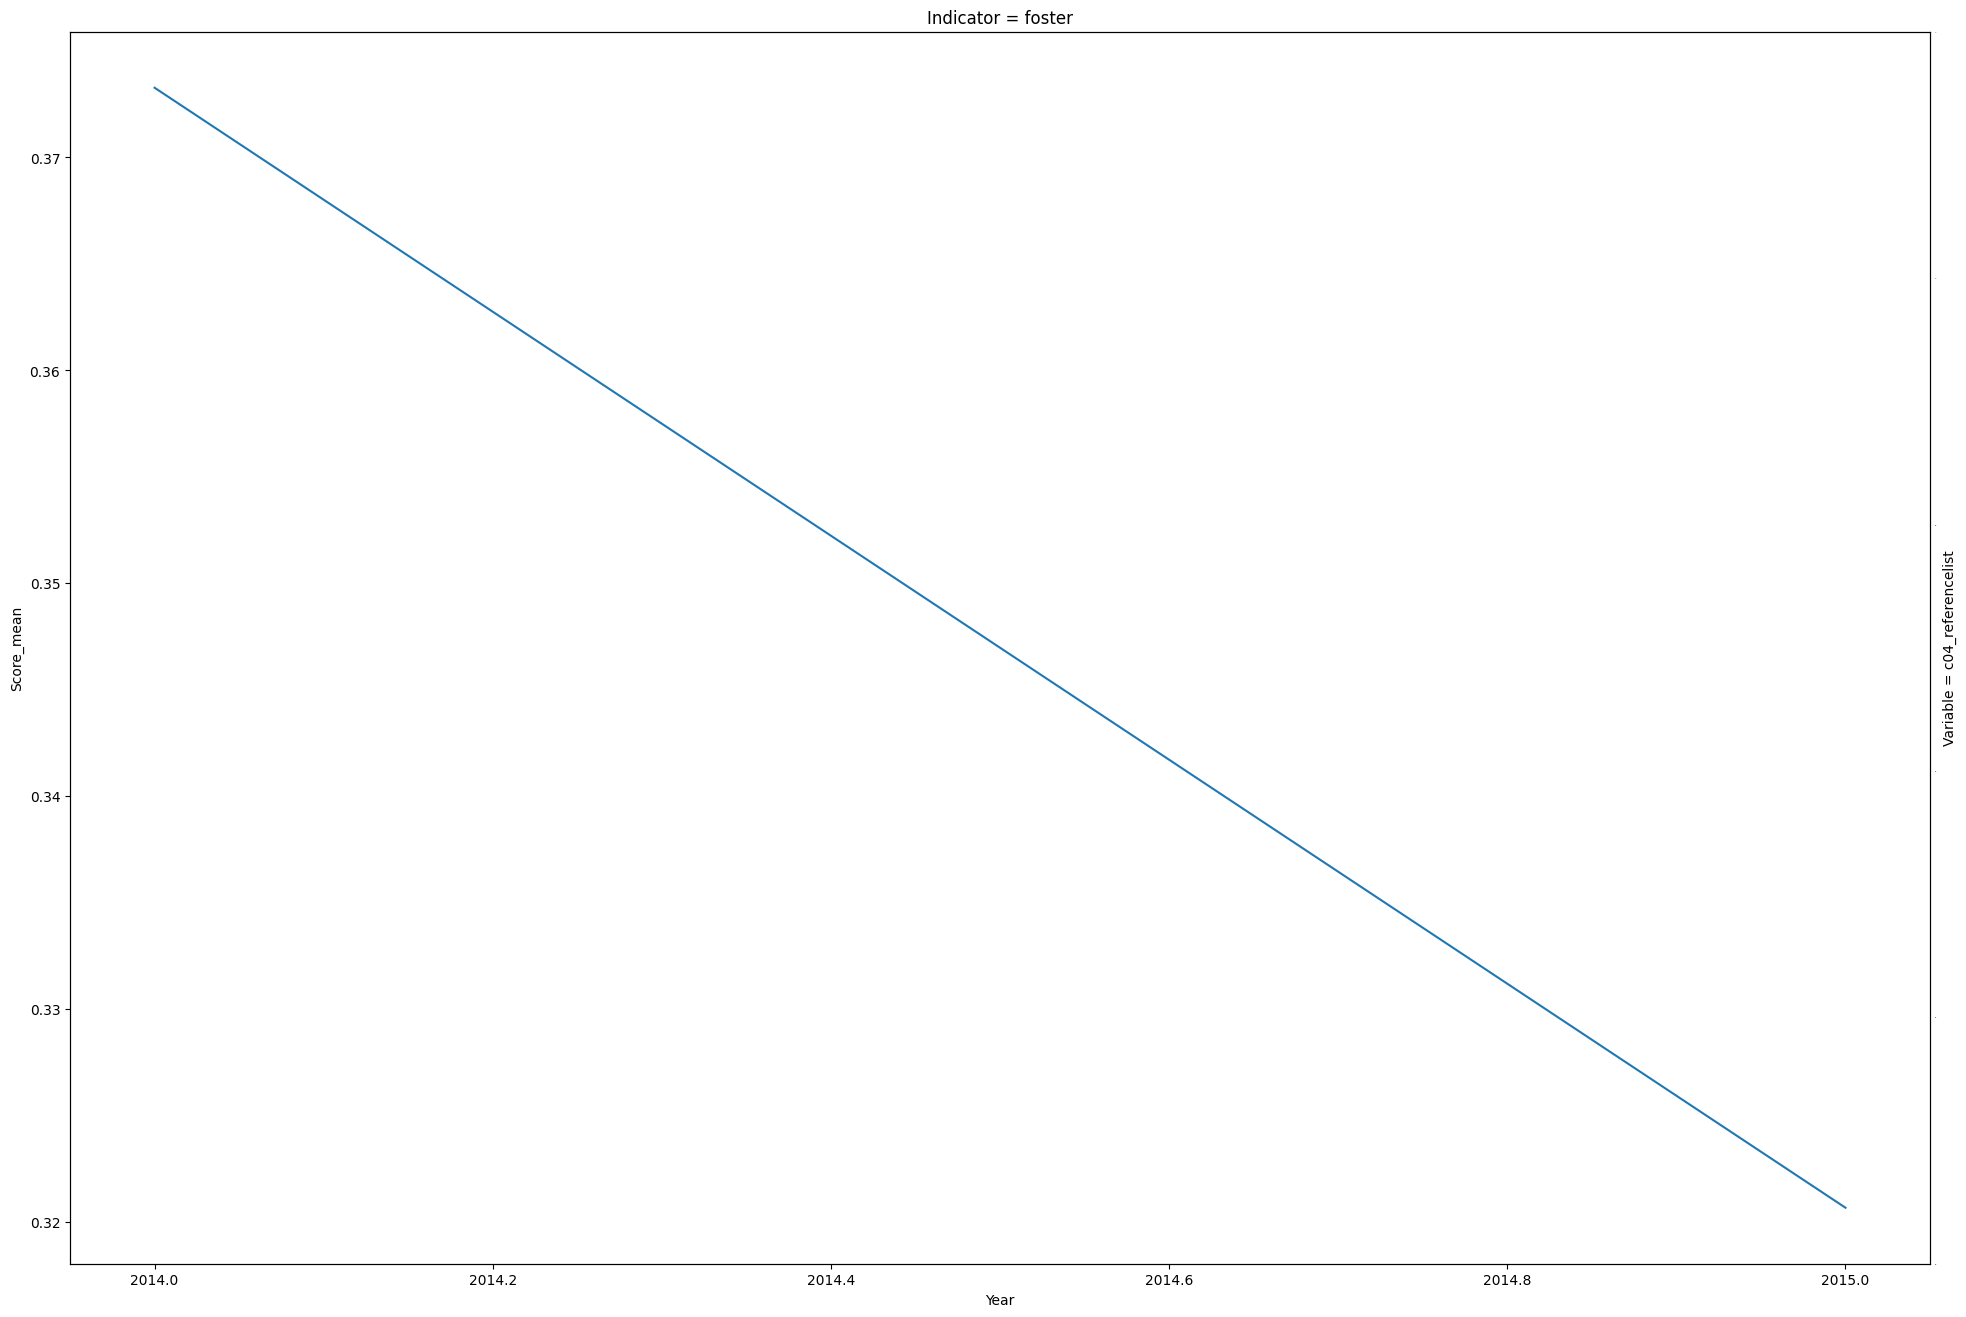

In [12]:
import novelpy

# Trend
trend = novelpy.utils.novelty_trend(year_range = range(2014,2016,1),
              variables = ["c04_referencelist"],
              id_variable = "PMID",
              indicators = ["foster"])

trend.get_plot_trend()

C:\/Users//FlorenceBlandinieres//OneDrive - Technopolis Group Ltd//RD_pub_patentforecast//FB_novelty\novelpy\utils\companion.py:233: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([self.df,df_temp], ignore_index=True)
c:\Users\FlorenceBlandinieres\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\FlorenceBlandinieres\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

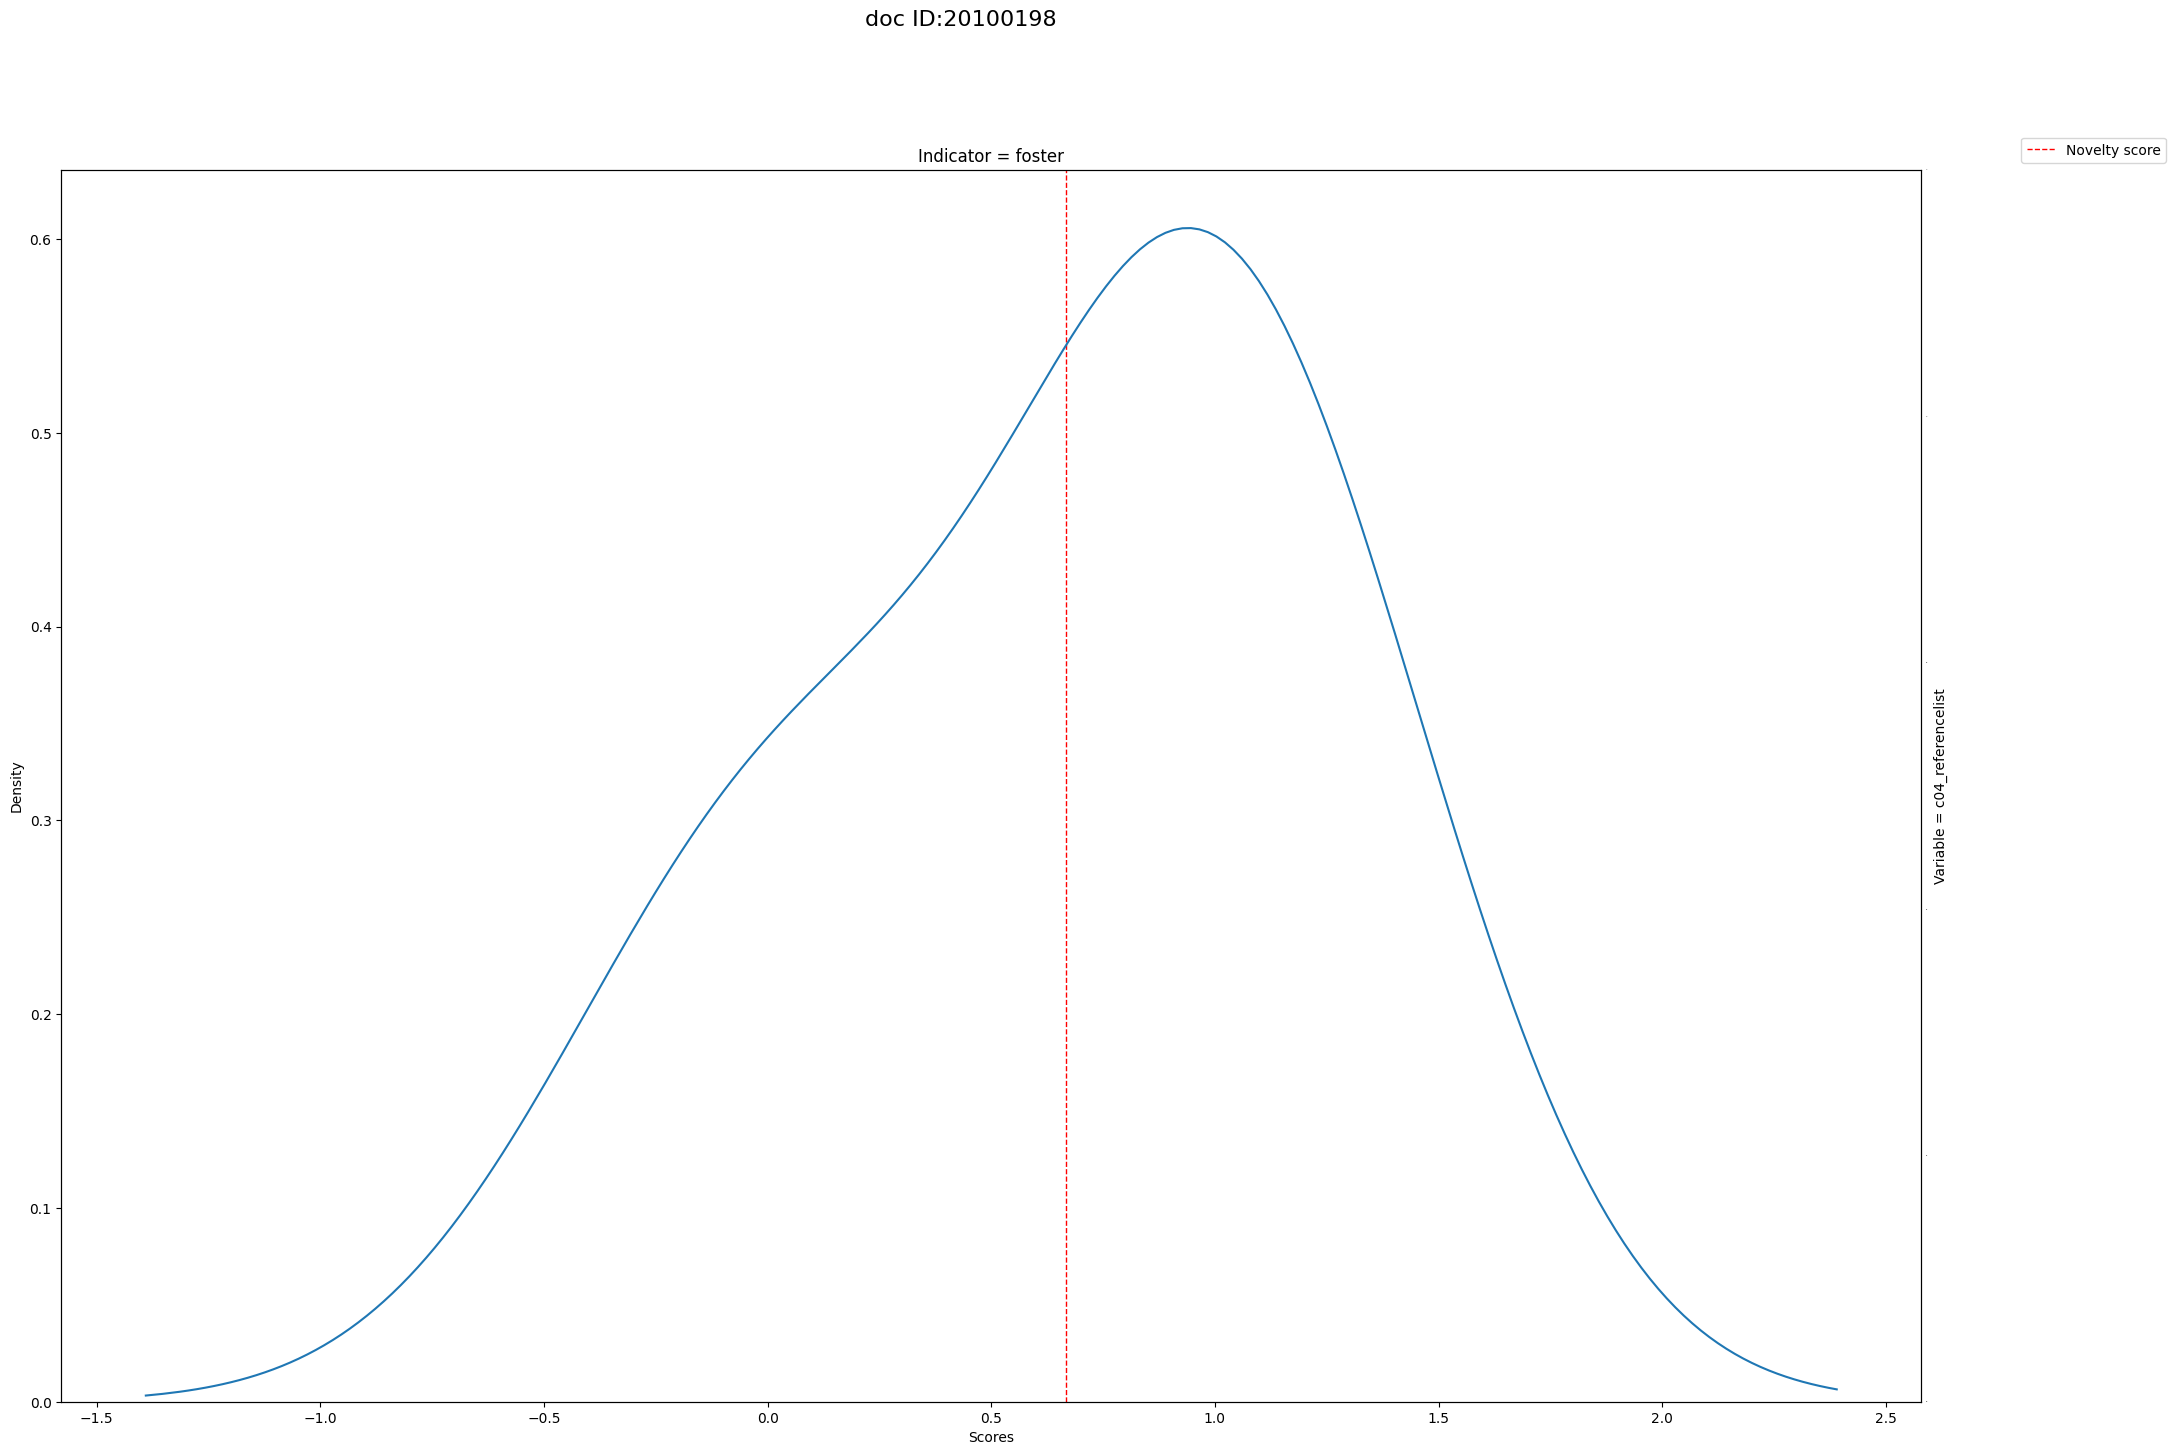

In [28]:
import novelpy

# Easy plot by calling the data just generated, different but issue with mongodb...
#{"PMID": 14525908, "c04_referencelist_foster": {"scores_array": [1.0, 0.0, 1.0], "score": {"novelty": 0.6666666666666666}}, "year": 2004}
dist = novelpy.utils.plot_dist(
                               doc_id = 20100198, #here last pmid from the json file linked to 2010
                               doc_year = 2010,
                               id_variable = "PMID",
                               variables = ["c04_referencelist"],
                               indicators = ["foster"])
dist.get_plot_dist()

In [ ]:
import os
import json

# Specify the directory where your JSON files are stored
json_directory = "/path/to/json/files" #to change

# Dictionary to store novelty scores for each PMID
novelty_scores_dict = {}

# Iterate through each JSON file in the directory
for filename in os.listdir(json_directory):
    if filename.endswith(".json"):
        file_path = os.path.join(json_directory, filename)

        # Load JSON data from the file
        with open(file_path, 'r') as file:
            json_data = json.load(file)

        # Iterate through each dictionary in the JSON data
        for entry in json_data:
            pmid = entry["PMID"]
            novelty_score = entry["c04_referencelist_foster"]["score"]["novelty"]

            # Add the novelty score to the dictionary for the corresponding PMID
            if pmid not in novelty_scores_dict:
                novelty_scores_dict[pmid] = []

            novelty_scores_dict[pmid].append(novelty_score)

In [33]:
for focal_year in tqdm.tqdm(range(2000,2011), desc = "Computing indicator for window of time"):
    Uzzi = novelpy.indicators.Uzzi2013(collection_name = "Ref_Journals_sample",
                                           id_variable = 'PMID',
                                           year_variable = 'year',
                                           variable = "c04_referencelist",
                                           sub_variable = "item",
                                           focal_year = focal_year,
                                           density = True)
    Uzzi.get_indicator()

Computing indicator for window of time:   0%|          | 0/11 [00:00<?, ?it/s]

loading cooc for focal year 2000
cooc loaded !
loading items for papers in 2000


get_papers_item: 100%|██████████| 49872/49872 [00:00<00:00, 1062104.67it/s]


items_loaded !
Creating sample ...


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


Create sample network: 100%|██████████| 20/20 [01:08<00:00,  3.44s/it]


Sample created !
Getting score per year ...


100%|██████████| 850661/850661 [07:51<00:00, 1803.67it/s]


Matrice done !
Getting score per paper ...


Computing indicator for window of time:   9%|▉         | 1/11 [09:44<1:37:21, 584.15s/it]

saved
Done !
loading cooc for focal year 2001
cooc loaded !
loading items for papers in 2001


get_papers_item: 100%|██████████| 52046/52046 [00:00<00:00, 841123.36it/s]


items_loaded !
Creating sample ...


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


Create sample network: 100%|██████████| 20/20 [01:36<00:00,  4.80s/it]


Sample created !
Getting score per year ...


100%|██████████| 885620/885620 [08:58<00:00, 1645.74it/s]


Matrice done !
Getting score per paper ...


Computing indicator for window of time:  18%|█▊        | 2/11 [20:55<1:35:20, 635.62s/it]

saved
Done !
loading cooc for focal year 2002
cooc loaded !
loading items for papers in 2002


get_papers_item: 100%|██████████| 54721/54721 [00:00<00:00, 72672.83it/s]


items_loaded !
Creating sample ...


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


Create sample network: 100%|██████████| 20/20 [01:35<00:00,  4.76s/it]


Sample created !
Getting score per year ...


100%|██████████| 1041814/1041814 [09:50<00:00, 1765.16it/s]


Matrice done !
Getting score per paper ...


Computing indicator for window of time:  27%|██▋       | 3/11 [32:51<1:29:38, 672.36s/it]

saved
Done !
loading cooc for focal year 2003
cooc loaded !
loading items for papers in 2003


get_papers_item: 100%|██████████| 58439/58439 [00:00<00:00, 666856.02it/s]


items_loaded !
Creating sample ...


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


Create sample network: 100%|██████████| 20/20 [01:36<00:00,  4.80s/it]


Sample created !
Getting score per year ...


Computing indicator for window of time:  27%|██▋       | 3/11 [38:45<1:43:22, 775.28s/it]


KeyboardInterrupt: 

Generate all novel indicators at once

In [30]:
import novelpy
import tqdm

# all the cooc possible not including the one done above: 10 tasks performed

ref_cooc = novelpy.utils.cooc_utils.create_cooc(
                 collection_name = "Ref_Journals_sample",
                 year_var="year",
                 var = "c04_referencelist",
                 sub_var = "item",
                 time_window = range(1995,2016),
                 weighted_network = False, self_loop = False)

ref_cooc.main()

ref_cooc = novelpy.utils.cooc_utils.create_cooc(
                 collection_name = "Meshterms_sample",
                 year_var="year",
                 var = "Mesh_year_category",
                 sub_var = "descUI",
                 time_window = range(1995,2016),
                 weighted_network = True, self_loop = True)

ref_cooc.main()

ref_cooc = novelpy.utils.cooc_utils.create_cooc(
                 collection_name = "Meshterms_sample",
                 year_var="year",
                 var = "Mesh_year_category",
                 sub_var = "descUI",
                 time_window = range(1995,2016),
                 weighted_network = False, self_loop = False)

ref_cooc.main()


# Uzzi et al.(2013) Meshterms_sample
for focal_year in tqdm.tqdm(range(2000,2011), desc = "Computing indicator for window of time"):
    Uzzi = novelpy.indicators.Uzzi2013(collection_name = "Meshterms_sample",
                                           id_variable = 'PMID',
                                           year_variable = 'year',
                                           variable = "Mesh_year_category",
                                           sub_variable = "descUI",
                                           focal_year = focal_year,
                                           density = True)
    Uzzi.get_indicator()

# Uzzi et al.(2013) Ref_Journals_sample
for focal_year in tqdm.tqdm(range(2000,2011), desc = "Computing indicator for window of time"):
    Uzzi = novelpy.indicators.Uzzi2013(collection_name = "Ref_Journals_sample",
                                           id_variable = 'PMID',
                                           year_variable = 'year',
                                           variable = "c04_referencelist",
                                           sub_variable = "item",
                                           focal_year = focal_year,
                                           density = True)
    Uzzi.get_indicator()

# Foster et al.(2015) Meshterms_sample
for focal_year in tqdm.tqdm(range(2000,2011), desc = "Computing indicator for window of time"):
    Foster = novelpy.indicators.Foster2015(collection_name = "Meshterms_sample",
                                           id_variable = 'PMID',
                                           year_variable = 'year',
                                           variable = "Mesh_year_category",
                                           sub_variable = "descUI",
                                           focal_year = focal_year,
                                           starting_year = 1995,
                                           community_algorithm = "Louvain",
                                           density = True)
    Foster.get_indicator()

# Lee et al.(2015) Meshterms_sample
for focal_year in tqdm.tqdm(range(2000,2011), desc = "Computing indicator for window of time"):
    Lee = novelpy.indicators.Lee2015(collection_name = "Meshterms_sample",
                                           id_variable = 'PMID',
                                           year_variable = 'year',
                                           variable = "Mesh_year_category",
                                           sub_variable = "descUI",
                                           focal_year = focal_year,
                                           density = True)
    Lee.get_indicator()

# Lee et al.(2015) Ref_Journals_sample
for focal_year in tqdm.tqdm(range(2000,2011), desc = "Computing indicator for window of time"):
    Lee = novelpy.indicators.Lee2015(collection_name = "Ref_Journals_sample",
                                           id_variable = 'PMID',
                                           year_variable = 'year',
                                           variable = "c04_referencelist",
                                           sub_variable = "item",
                                           focal_year = focal_year,
                                           density = True)
    Lee.get_indicator()

# Wang et al.(2017) Meshterms_sample
for focal_year in tqdm.tqdm(range(2000,2011)):
    Wang = novelpy.indicators.Wang2017(collection_name = "Meshterms_sample",
                                           id_variable = 'PMID',
                                           year_variable = 'year',
                                           variable = "Mesh_year_category",
                                           sub_variable = "descUI",
                                           focal_year = focal_year,
                                           time_window_cooc = 3,
                                           n_reutilisation = 1,
                                           starting_year = 1995,
                                           density = True)
    Wang.get_indicator()


# Wang et al.(2017) Ref_Journals_sample
for focal_year in tqdm.tqdm(range(2000,2011)):
    Wang = novelpy.indicators.Wang2017(collection_name = "Ref_Journals_sample",
                                           id_variable = 'PMID',
                                           year_variable = 'year',
                                           variable = "c04_referencelist",
                                           sub_variable = "item",
                                           focal_year = focal_year,
                                           time_window_cooc = 3,
                                           n_reutilisation = 1,
                                           starting_year = 1995,
                                           density = True)
    Wang.get_indicator()

for every year:   0%|          | 0/21 [00:00<?, ?it/s]

Computing indicator for window of time:   0%|          | 0/11 [00:00<?, ?it/s]

loading cooc for focal year 2000
cooc loaded !
loading items for papers in 2000


get_papers_item: 100%|██████████| 49872/49872 [00:00<00:00, 152027.64it/s]


items_loaded !
Creating sample ...


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


start sampling


Create sample network: 100%|██████████| 20/20 [52:16<00:00, 156.85s/it]


Sample created !
Getting score per year ...


Computing indicator for window of time:   0%|          | 0/11 [1:20:58<?, ?it/s]


KeyboardInterrupt: 

Shibaya et al. 
Here requires the title or abstracts for articles cited by focal papers and, therefore, the id for each paper cited (examples available within the “Title_abs_sample” and “Citation_net_sample” datasets). We then embed the articles using spacy and do a cosine similarity between the embeddings of cited papers for focal papers. One can find a pre train here https://pypi.org/project/scispacy/. We used en_core_sci_lg-0.4.0

In [ ]:
from novelpy.utils.embedding import Embedding

embedding = Embedding(
            year_variable = 'year',
            time_range = range(2000,2011),
            id_variable = 'PMID',
            references_variable = 'refs_pmid_wos',
            pretrain_path = 'en_core_sci_lg-0.4.0/en_core_sci_lg/en_core_sci_lg-0.4.0',
            title_variable = 'ArticleTitle',
            abstract_variable = 'a04_abstract',
            abstract_subvariable = 'AbstractText')

# articles

embedding.get_articles_centroid(
      collection_articles = 'Title_abs_sample',
      collection_embedding = 'embedding',
      year_range = range(2000,2011,1))